In [182]:
# Bibliotecas necessárias para uso na aplicaçao.

!pip install numpy
!pip install matplotlib
!pip install moviepy

In [ ]:
# Imports das bibliotecas.

import numpy as np
import matplotlib.pyplot as plt
import moviepy.editor as mpe

In [ ]:
# Carregamento do arquivo de vídeo.

# video = mpe.VideoFileClip("intro.mp4")
video = mpe.VideoFileClip("subclip_for_tests.mp4")

In [ ]:
# Apresentaçao do arquivo de vídeo.

video.ipython_display(width=480, maxduration=75)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [ ]:
# Apresentaçao dos dados do vídeo para facilitar cálculos posteriores.

fps = video.fps
total_frames = video.reader.nframes
total_time = video.duration

print("FPS:", fps)
print("Total de frames:", total_frames)
print("Tempo total:", total_time, "seg / ", total_time / 60, "min")

FPS: 24.0
Total de frames: 121
Tempo total: 5.04 seg /  0.084 min


In [ ]:
# Esta funçao auxilia no cálculo para encontrar
# o tempo exato de cada frame de acordo com seu índice.
def frame_time(frame_index):
  return (1 / fps) * frame_index

In [ ]:
# Esta funçao converte uma imagem RGB para escala de cinza
# Uma observaçao é que o threshold utilizado é de 82,
# dando ainda mais destaque pros pixels mais claros.
def grayscale(frame):
    (l,c,p) = frame.shape
    frame_bw = np.average(frame, axis=2).astype(np.float64)

    abs_tg_c = np.abs(np.diff(frame_bw.astype(np.float64), axis=0, append=255))
    abs_tg_l = np.abs(np.diff(frame_bw.astype(np.float64), axis=1, append=255))
    abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)

    frame_3p = np.zeros(shape=(l,c,p),dtype=np.uint8)
    frame_3p[abs_tg > 82] = 255
    frame_3p[:,:, 0] = frame_bw
    frame_3p[:,:, 1] = frame_bw
    frame_3p[:,:, 2] = frame_bw

    return frame_3p

In [ ]:
# Apresentaçao do novo vídeo já com a transformaçao
# de frames para escala cinza.

gray_video = video.fl_image(grayscale)
gray_video.ipython_display(width=480, maxduration=75)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


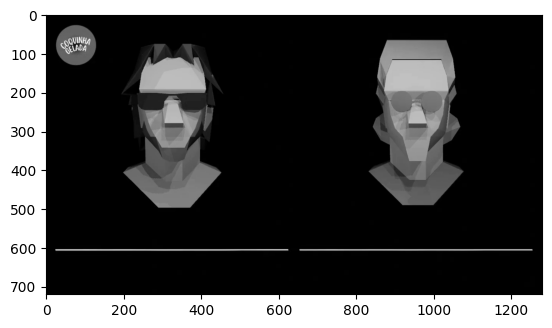

In [ ]:
# Aqui é selecionado um frame onde nenhum dos interlocutores está falando
# A ideia é que este seja um frame de referencia para os cálculos a seguir.
no_voice_frame = gray_video.get_frame(0)
plt.imshow(no_voice_frame)

Índice do frame:  111
Tempo do frame:  4.625 seg


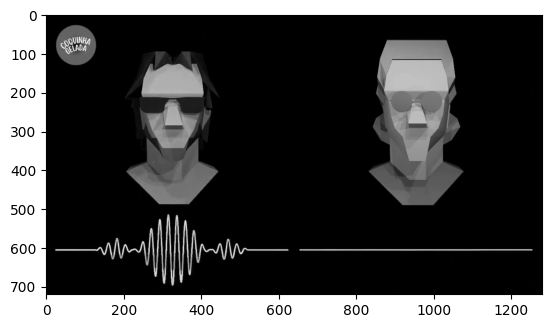

In [ ]:
# Apenas para demonstraçao da técnica,
# a ideia é que frames em que os interlocutores estao falando,
# tenha diferenças significativas na tonalidade, quantidade
# e movimentaçao dos pixels.
#
# Aqui, por exemplo, dá pra perceber a diferença entre o frame 0 (sem fala)
# e o frame 111 (com fala). O personagem a esquerda está menor,
# assim como a barra inferior de áudio possui uma forma de onda bem definida.
frame_index = 111
time = frame_time(frame_index)
print("Índice do frame: ", frame_index)
print("Tempo do frame: ", time, "seg")

voice_frame = gray_video.get_frame(time)
plt.imshow(voice_frame)

In [185]:
# Aqui é feito o cálculo para definir a similaridade
# entre o frame de referencia (frame 0) e os demais frames do vídeo.

frames = gray_video.iter_frames()
total_talking_frames = 0

for frame in frames:
  # Para o cálculo, é feita a diferença dos frames.
  # O array obtido é entao normalizado para valores positivos
  # e, por fim, a média dos pixels é calculada.
  deviation = np.mean(np.abs(no_voice_frame - frame))

  # Caso a diferença média entre os pixels dos frames
  # seja superior a 1 (valor identificado empiricamente),
  # o frame atual será considerado um frame em que o interlocutor fala.
  if deviation > 1:
    total_talking_frames += 1

print("Total de frames: ", total_frames)
print("Total de frames em que há fala: ", total_talking_frames)
print("Tempo aproximado em que há fala: ", (total_talking_frames / total_frames) * total_time, "seg")

Total de frames:  121
Total de frames em que há fala:  22
Tempo aproximado em que há fala:  0.9163636363636364 seg
